In [83]:
import pandas as pd

In [84]:
!wget "https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv" -O "../dataset/jamb.csv"

--2024-11-04 11:44:08--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-04 11:44:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘../dataset/jamb.csv’

../dataset/jamb.csv 100%[===================>] 382.33K  --.-KB/s    in 0.06s   

2024-11-04 11:44:09 (6.23 MB/s) - ‘../dataset/jamb.cs

In [85]:
df = pd.read_csv("../dataset/jamb.csv", keep_default_na=False, na_values=['', 'NaN', 'null'])

# Data Preparation

In [86]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [87]:
df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,Public,Public,Public,Public,Public
school_location,Urban,Rural,Rural,Urban,Urban
extra_tutorials,Yes,No,Yes,No,No
access_to_learning_materials,Yes,Yes,Yes,Yes,Yes
parent_involvement,High,High,High,Medium,Medium


In [88]:
del df['student_id']
df.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,Public,Public,Public,Public,Public
school_location,Urban,Rural,Rural,Urban,Urban
extra_tutorials,Yes,No,Yes,No,No
access_to_learning_materials,Yes,Yes,Yes,Yes,Yes
parent_involvement,High,High,High,Medium,Medium


In [89]:
df.parent_education_level.unique()

array(['Tertiary', 'None', 'Primary', 'Secondary'], dtype=object)

In [90]:
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [91]:
df.fillna(0) #just in case

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,None,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,18,Male,Medium,Secondary,1


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [94]:
len(df), len(df_train), len(df_test), len(df_val)

(5000, 3000, 1000, 1000)

In [95]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [96]:
y_train= df_train['jamb_score']
y_val= df_val['jamb_score']
y_test= df_test['jamb_score']

In [97]:
len(y_train), len(y_val), len(y_test)

(3000, 1000, 1000)

In [98]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [99]:
from sklearn.feature_extraction import DictVectorizer

In [100]:
dv = DictVectorizer(sparse=True)

In [101]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [102]:
X_train=dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [103]:
dv_feature_names = dv.get_feature_names_out()


# Question 1

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
dt=DecisionTreeRegressor(max_depth=1)

In [106]:
dt.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=1)

In [107]:
from sklearn.tree import export_text

In [108]:
output=export_text(dt, feature_names=dv_feature_names)
print(output)

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [109]:
def parse_tree_output(tree_output):
    if tree_output is None:
        print("No tree output available to parse.")
        return []
    
    feature_names = set()
    for line in tree_output.strip().split('\n'):
        if '|---' in line:
            feature_part = line.split('|---')[1].strip()
            
            
            if '<=' in feature_part or '>' in feature_part:
                feature_name = feature_part.split()[0]  
                feature_names.add(feature_name)
    
    return list(feature_names)

In [110]:
print(output)
feature_names_in_tree = parse_tree_output(output)

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [111]:
print(feature_names_in_tree)

['study_hours_per_week']


In [112]:
print(f'The feature used for splitting the data is: {feature_names_in_tree}')

The feature used for splitting the data is: ['study_hours_per_week']


# Question 2

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
from sklearn.metrics import roc_auc_score

In [115]:
import numpy as np

In [116]:
def train_forest_regression(n_estimators, max_depth, X_train, y_train, X_val, y_val):
   rf=RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=1, n_jobs=-1) 
   rf.fit(X_train, y_train)
   y_pred_val = rf.predict(X_val)
   return rmse(y_val, y_pred_val), rf

In [117]:
def rmse(y, y_pred):
    error = y-y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse).round(3)
    

In [118]:
rmse_value, rf = train_forest_regression(10, None, X_train, y_train, X_val, y_val)
rmse_value

41.825

In [119]:
possible_values = [22.13, 42.13, 62.13, 82.12]

In [120]:
closest_value = min(possible_values, key=lambda x: abs(x - rmse_value))

In [121]:
# Answer to Question 1

In [122]:
print("The value that is closest to the rmse is:", closest_value)

The value that is closest to the rmse is: 42.13


# Question 3

In [123]:
import matplotlib.pyplot as plt

In [124]:
rmse_list = []
for n in range(10,210, 10):
    rmse_for_n, rf = train_forest_regression(n, None, X_train, y_train, X_val, y_val)
    rmse_list.append((n, rmse_for_n))
df_rmse = pd.DataFrame(rmse_list, columns = ["n_estimators", "rmse"])

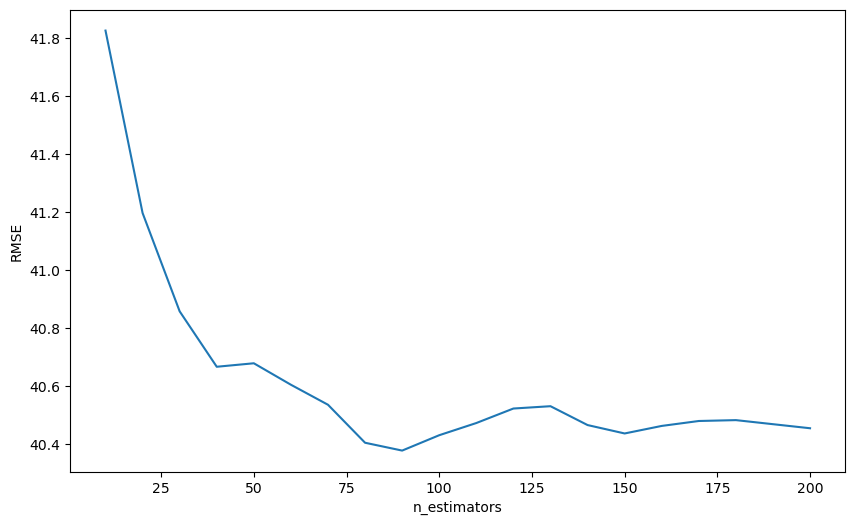

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(df_rmse['n_estimators'], df_rmse['rmse'])
plt.xlabel('n_estimators')
plt.ylabel('RMSE')

plt.show()


In [126]:
#Answer Question 3

In [127]:
print('Rmse stops improving when n_estimators is 80')

Rmse stops improving when n_estimators is 80


# Question 4

In [128]:
rmse_list=[]
depth_values = [10,15,20,25]
for depth in depth_values:
    rmse_for_n_list = []
    for n in range(10,210, 10):
        rmse_for_n, rf = train_forest_regression(n, depth, X_train, y_train, X_val, y_val)
        rmse_for_n_list.append(rmse_for_n)
    mean_rmse_for_n= np.mean(rmse_for_n_list)
    rmse_list.append((depth, mean_rmse_for_n))
df_rmse = pd.DataFrame(rmse_list, columns = ["max_depth", "mean_rmse"])
df_rmse

,max_depth,mean_rmse
0,10,40.36500
1,15,40.63980
2,20,40.68450
3,25,40.61145


In [129]:
row_min_rmse = df_rmse.loc[df_rmse['mean_rmse'].idxmin()]
best_max_depth = row_min_rmse['max_depth']
best_max_depth

10.0

In [130]:
#Answer Question 4

In [131]:
print('The best max_depth is: ', best_max_depth)

The best max_depth is:  10.0


# Question 5

In [132]:
rmse_for_n, model = train_forest_regression(n_estimators=10, max_depth=20, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
rmse_for_n

41.955

In [133]:
features_importance = model.feature_importances_
features_importance

array([0.01093634, 0.01014068, 0.06981166, 0.03049321, 0.14898619,
       0.13492521, 0.01018578, 0.01170238, 0.01063523, 0.0088544 ,
       0.01757751, 0.01215927, 0.01102292, 0.01163625, 0.01497637,
       0.01496113, 0.01423605, 0.02199681, 0.01400047, 0.01108758,
       0.00998864, 0.00825745, 0.0095368 , 0.007989  , 0.02570122,
       0.00975894, 0.00986943, 0.24633057, 0.08224251])

In [134]:
importance_df = pd.DataFrame({
    'feature': dv_feature_names,
    'importance': features_importance
})

In [135]:
possible_features = ['study_hours_per_week', 'attendance_rate', 'distance_to_school', 'teacher_quality']
filtered_importance_df=importance_df[importance_df.feature.isin(possible_features)]
filtered_importance_df

,feature,importance
4,attendance_rate,0.148986
5,distance_to_school,0.134925
27,study_hours_per_week,0.246331
28,teacher_quality,0.082243


In [136]:
highest_importance_index = filtered_importance_df['importance'].idxmax()
highest_importance_row = filtered_importance_df.loc[highest_importance_index]

In [137]:
#Answer Question 5

In [138]:
print(f"The most important feature is: '{highest_importance_row['feature']}' with an importance value of: {highest_importance_row['importance']}")

The most important feature is: 'study_hours_per_week' with an importance value of: 0.24633057043200604


# Question 6

In [139]:
!pip install xgboost

In [140]:
import xgboost as xgb

In [141]:
def train_with_eta(eta, feature_names, X_train, y_train, X_val, y_val):
    print ('Training with eta: ', eta)
    d_train=xgb.DMatrix(X_train, label=y_train, feature_names=list(feature_names))
    d_val=xgb.DMatrix(X_val, label=y_val, feature_names=list(feature_names))
    xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
    }
    watchlist = [(d_train, 'train'), (d_val, 'val')]
    evals_result={}
    output = xgb.train(xgb_params, d_train, num_boost_round=100, evals=watchlist, evals_result=evals_result)
    return evals_result["val"]["rmse"][-1]

In [142]:
eta=0.3
etas_dict={}
etas_dict[eta] = train_with_eta(eta=eta, feature_names=dv_feature_names, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
etas_dict

Training with eta:  0.3
[0]	train-rmse:42.69384	val-rmse:44.89114
[1]	train-rmse:39.83326	val-rmse:43.07010
[2]	train-rmse:37.94542	val-rmse:42.00332
[3]	train-rmse:36.56125	val-rmse:41.46452
[4]	train-rmse:35.44252	val-rmse:40.88896
[5]	train-rmse:34.57756	val-rmse:40.69096
[6]	train-rmse:33.84230	val-rmse:40.59315
[7]	train-rmse:33.25929	val-rmse:40.47993
[8]	train-rmse:32.79415	val-rmse:40.45326
[9]	train-rmse:32.16019	val-rmse:40.43929
[10]	train-rmse:31.63404	val-rmse:40.48319
[11]	train-rmse:31.17673	val-rmse:40.68201
[12]	train-rmse:30.87313	val-rmse:40.63522
[13]	train-rmse:30.30310	val-rmse:40.70983
[14]	train-rmse:30.00098	val-rmse:40.78133
[15]	train-rmse:29.41497	val-rmse:40.86107
[16]	train-rmse:29.25816	val-rmse:40.96580
[17]	train-rmse:28.59378	val-rmse:41.12190
[18]	train-rmse:28.27990	val-rmse:41.14360
[19]	train-rmse:27.94572	val-rmse:41.22835
[20]	train-rmse:27.49658	val-rmse:41.27921
[21]	train-rmse:27.25449	val-rmse:41.32427
[22]	train-rmse:27.06652	val-rmse:41.418

{0.3: 43.418817373880884}

In [143]:
eta=0.1
etas_dict[eta] = train_with_eta(eta=eta, feature_names=dv_feature_names, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
etas_dict

Training with eta:  0.1
[0]	train-rmse:45.49999	val-rmse:47.00533
[1]	train-rmse:44.12948	val-rmse:45.92344
[2]	train-rmse:42.94858	val-rmse:44.98366
[3]	train-rmse:41.90896	val-rmse:44.25755
[4]	train-rmse:40.96728	val-rmse:43.57339
[5]	train-rmse:40.17514	val-rmse:43.11181
[6]	train-rmse:39.40436	val-rmse:42.61054
[7]	train-rmse:38.71199	val-rmse:42.18883
[8]	train-rmse:38.08081	val-rmse:41.86754
[9]	train-rmse:37.57559	val-rmse:41.64338
[10]	train-rmse:37.07490	val-rmse:41.39235
[11]	train-rmse:36.58709	val-rmse:41.14265
[12]	train-rmse:36.14574	val-rmse:40.95201
[13]	train-rmse:35.76896	val-rmse:40.81778
[14]	train-rmse:35.40802	val-rmse:40.75008
[15]	train-rmse:35.08521	val-rmse:40.61341
[16]	train-rmse:34.74187	val-rmse:40.51800
[17]	train-rmse:34.43969	val-rmse:40.41659
[18]	train-rmse:34.16132	val-rmse:40.33546
[19]	train-rmse:33.91836	val-rmse:40.25632
[20]	train-rmse:33.67389	val-rmse:40.25010
[21]	train-rmse:33.45853	val-rmse:40.19826
[22]	train-rmse:33.23371	val-rmse:40.211

{0.3: 43.418817373880884, 0.1: 41.050340171841135}

In [144]:
best_eta = min(etas_dict, key=etas_dict.get)
min_error = etas_dict[best_eta]
min_error

41.050340171841135

In [145]:
#Answer Question 6

In [146]:
print(f'The best esta is: {best_eta} with square error: {min_error}')

The best esta is: 0.1 with score: 41.050340171841135
